In [161]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [162]:
path = "FilmDF.csv"

filmIDDF=pd.read_csv(path)
filmIDDF.head(30)

,Title,Year,Runtime,Genre,Metascore,Votes,Rating,Director,Cast,Genre_1
0,The Dark Knight,2008,152 min,"Action, Crime, Drama",84,2225873,9.0,Christopher Nolan,Christian Bale,Action
1,Dag II,2016,107 min,"Action, Drama, War",None,103692,8.9,Alper Caglar,Caglar Ertugrul,Action
2,Inception,2010,148 min,"Action, Adventure, Sci-Fi",74,1983338,8.8,Christopher Nolan,Leonardo DiCaprio,Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",92,1610114,8.8,Peter Jackson,Elijah Wood,Action
4,The Matrix,1999,136 min,"Action, Sci-Fi",73,1620794,8.7,Lana Wachowski,Lilly Wachowski,Action
5,Star Wars: Episode V - The Empire Strikes Back,1980,124 min,"Action, Adventure, Fantasy",82,1125461,8.7,Irvin Kershner,Mark Hamill,Action
6,Seppuku,1962,133 min,"Action, Drama, History",85,35735,8.7,Masaki Kobayashi,Tatsuya Nakadai,Action
7,Star Wars,1977,121 min,"Action, Adventure, Fantasy",90,1197746,8.6,George Lucas,Mark Hamill,Action
8,Shichinin no samurai,1954,207 min,"Action, Adventure, Drama",98,305342,8.6,Akira Kurosawa,Toshirô Mifune,Action
9,Gladiator,2000,155 min,"Action, Adventure, Drama",67,1298668,8.5,Ridley Scott,Russell Crowe,Action


In [54]:
filmIDDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      5062 non-null   object 
 1   Year       5062 non-null   int64  
 2   Runtime    5062 non-null   object 
 3   Genre      5062 non-null   object 
 4   Metascore  5062 non-null   object 
 5   Votes      5062 non-null   int64  
 6   Rating     5062 non-null   float64
 7   Director   5062 non-null   object 
 8   Cast       5062 non-null   object 
 9   Genre_1    5062 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 395.6+ KB


Text(0.5, 1.0, 'Genre Popularity')

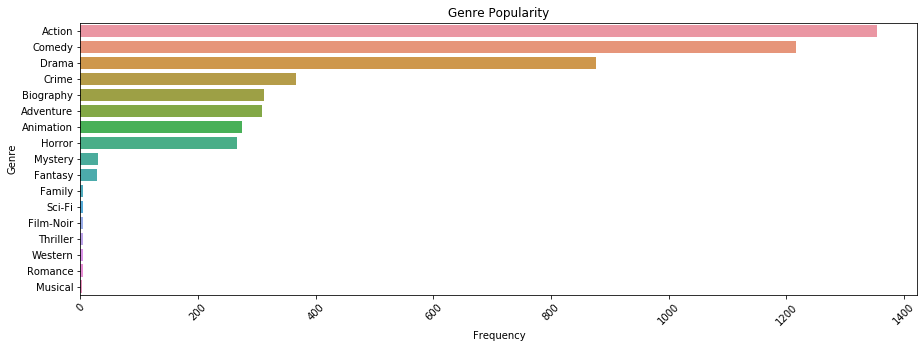

In [126]:
plt.figure(figsize=(15,5))
sns.barplot(x=filmIDDF['Genre_1'].value_counts().values, 
            y=filmIDDF['Genre_1'].value_counts().index)
plt.xticks(rotation= 45)
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Genre Popularity')

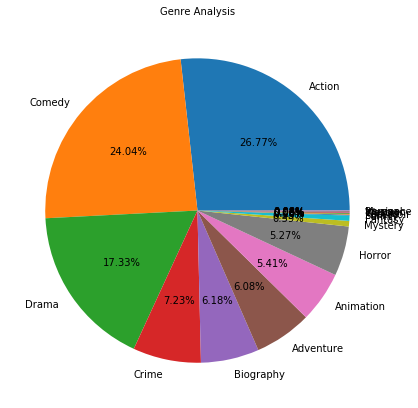

In [39]:
labels=filmIDDF['Genre_1'].value_counts().index
#colors=['blue','red','yellow','green','brown']
# 위의 특정 부분에 대한 간격으로 튀어나온 부분 표시..
#explode=[0,0.3,0.1,0,0]
values=filmIDDF['Genre_1'].value_counts().values

#그리기
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title('Genre Analysis',color='black',fontsize=10)
plt.show()


Text(0.5, 1.0, 'Genre Popularity by rating')

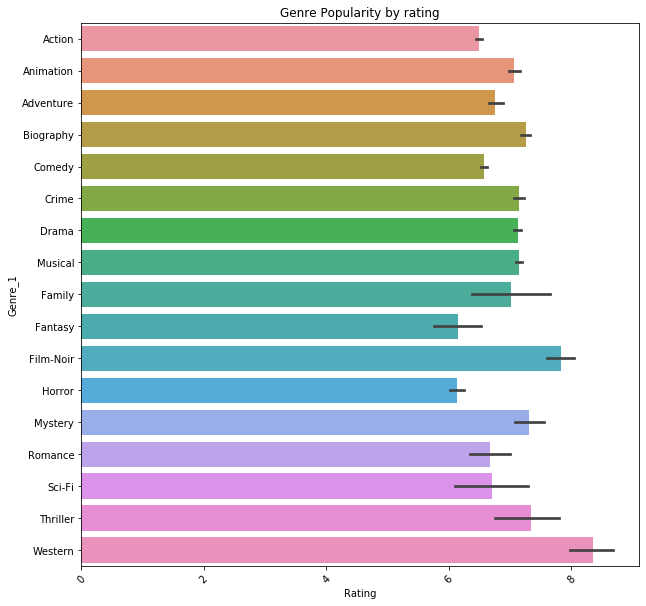

In [192]:
plt.figure(figsize=(10,10))
sns.barplot(x=filmIDDF['Rating'], 
            y=filmIDDF['Genre_1'])
plt.xticks(rotation= 45)
plt.xlabel('Rating')
plt.ylabel('Genre_1')
plt.title('Genre Popularity by rating')

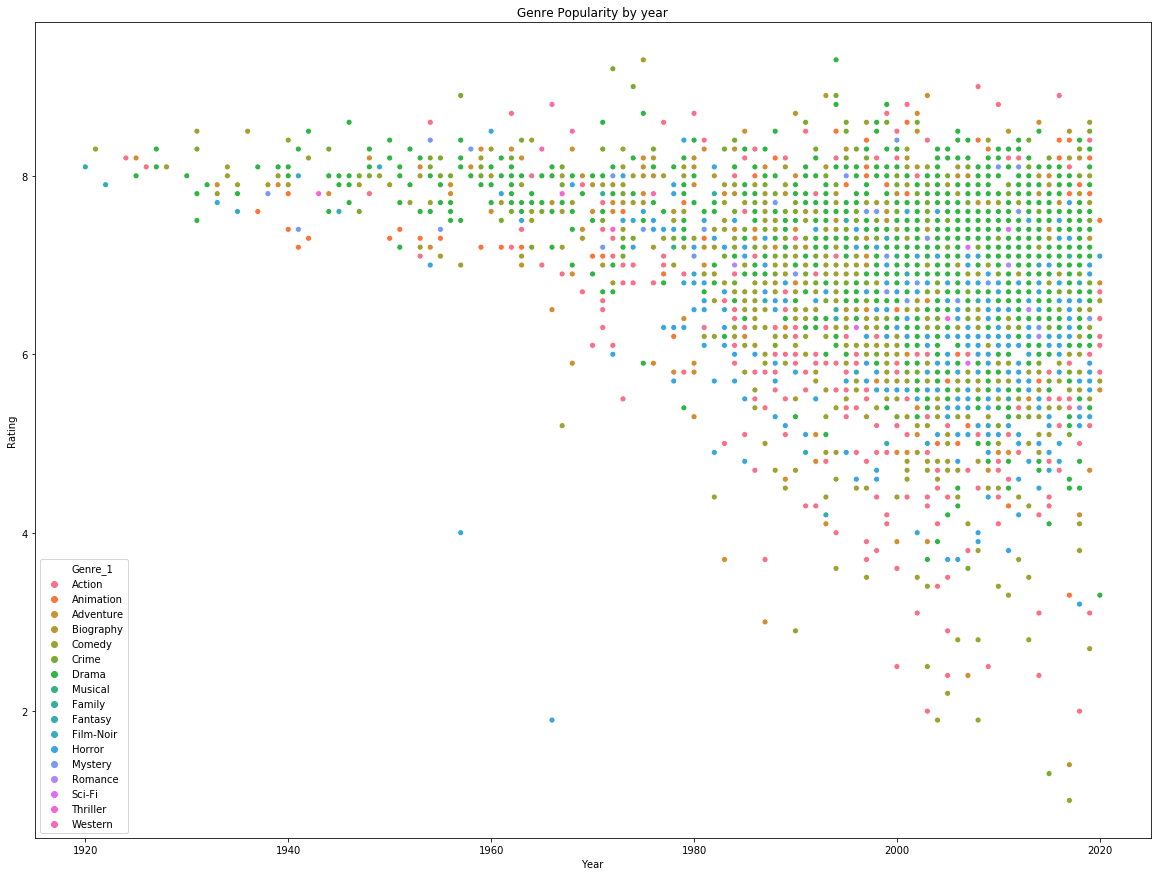

In [180]:
plt.rcParams["figure.figsize"] = (20,15)
sns.scatterplot(x='Year'
           ,y='Rating',
           hue='Genre_1',
           data=filmIDDF,)



plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Genre Popularity by year')
plt.show()

In [ ]:
filmIDDF=fi

In [13]:
filmIDDF["Genre_1"].value_counts()

Action       1826
Comedy       1364
Drama        1041
Crime         463
Biography     367
Adventure     358
Horror        337
Animation     315
Mystery        38
Fantasy        31
Family          5
Film-Noir       4
Sci-Fi          4
Romance         4
Western         4
Thriller        4
Musical         2
Name: Genre_1, dtype: int64

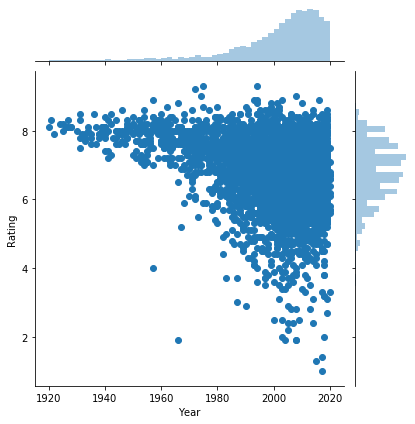

In [29]:
sns.jointplot(x="Year", y="Rating", data=filmIDDF)

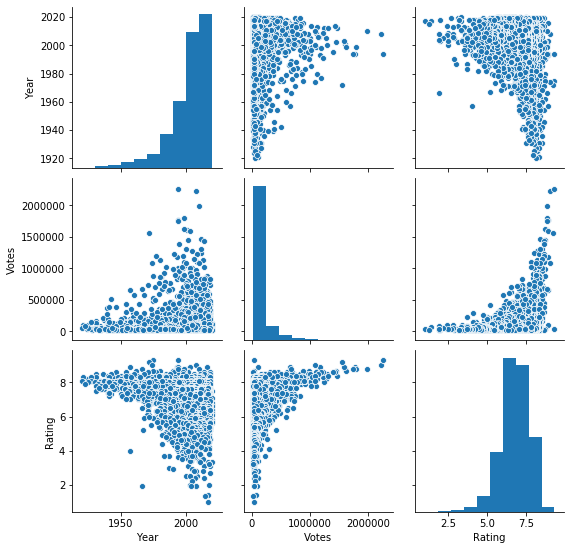

In [38]:
sns.pairplot(filmIDDF[["Year","Votes","Rating"]])

Text(0.5, 1.0, 'Christopher Nolan Rating')

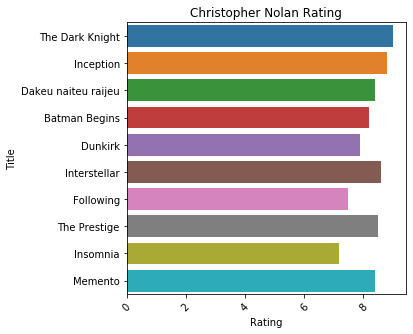

In [174]:
Nolan = filmIDDF[filmIDDF['Director'] == 'Christopher Nolan']


plt.figure(figsize=(5,5))
sns.barplot(x=Nolan['Rating'], 
            y=Nolan['Title'])
plt.xticks (rotation= 45)
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Christopher Nolan Rating')

Text(0, 0.5, 'Title')

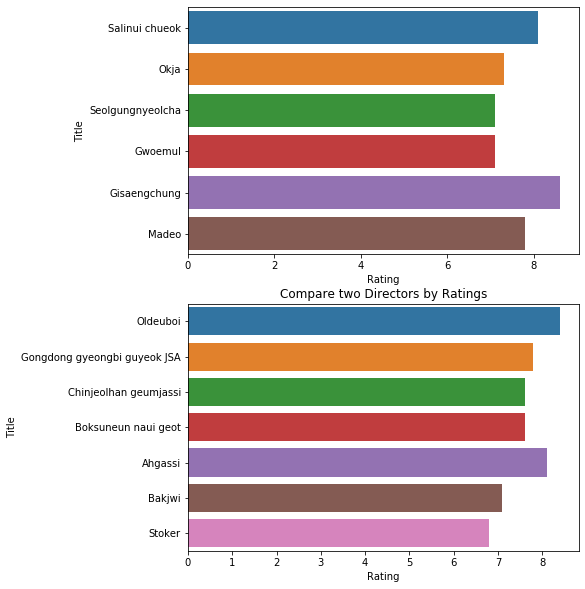

In [172]:
Bong = filmIDDF[filmIDDF['Director'] == 'Bong Joon Ho']
Park = filmIDDF[filmIDDF['Director'] == 'Chan-wook Park']
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (7,10))

sns.barplot(x=Bong['Rating'], 
            y=Bong['Title'],
           ax = axes[0])

plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Compare two Directors by Ratings')


sns.barplot(x=Park['Rating'], 
            y=Park['Title'],
           ax = axes[1])

plt.xlabel('Rating')
plt.ylabel('Title')





In [188]:
filmIDDF.sort_values(by = "Rating", ascending = True).head(60)

,Title,Year,Runtime,Genre,Metascore,Votes,Rating,Director,Cast,Genre_1
3466,Cumali Ceber: Allah Seni Alsin,2017,100 min,Comedy,None,37550,1.0,Gökhan Gök,Halil Söyletmez,Comedy
3832,Kod Adi K.O.Z.,2015,114 min,"Crime, Mystery",None,27053,1.3,Celal Çimen,Cem Kurtoglu,Crime
2248,Reis,2017,108 min,"Biography, Drama",None,72128,1.4,Hüdaverdi Yavuz,Orhan Aydin,Biography
3463,Disaster Movie,2008,87 min,Comedy,15,85883,1.9,Jason Friedberg,Aaron Seltzer,Comedy
5014,Manos: The Hands of Fate,1966,70 min,Horror,None,34375,1.9,Harold P. Warren,Tom Neyman,Horror
3464,The Hottie & the Nottie,2008,91 min,"Comedy, Romance",7,35905,1.9,Tom Putnam,Paris Hilton,Comedy
3465,Superbabies: Baby Geniuses 2,2004,88 min,"Comedy, Family, Sci-Fi",9,29487,1.9,Bob Clark,Jon Voight,Comedy
1400,House of the Dead,2003,90 min,"Action, Adventure, Horror",15,35547,2.0,Uwe Boll,Jonathan Cherry,Action
1399,Race 3,2018,160 min,"Action, Thriller",None,31208,2.0,Remo D'Souza,Anil Kapoor,Action
3462,Son of the Mask,2005,94 min,"Comedy, Family, Fantasy",20,51408,2.2,Lawrence Guterman,Jamie Kennedy,Comedy
